In [1]:
import os
import numpy as np
from glob import glob

## to do list:
1. create validation set and sample set
2. move to separate dirs for each set
3. finetune and train
4. submit

# Create validation set and sample set

In [2]:
%pwd

u'/home/hsgui/repo/nbs'

In [3]:
%cd data/dogs-vs-cats-redux-kernels-edition/

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition


In [4]:
%cd train/

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition/train


In [5]:
g = glob('*.jpg')
shu = np.random.permutation(g)
for i in range(2000): os.rename(shu[i], '../valid/' + shu[i])

In [6]:
%mkdir ../sample/train
%mkdir ../sample/valid

mkdir: cannot create directory ‘../sample/train’: File exists
mkdir: cannot create directory ‘../sample/valid’: File exists


In [7]:
from shutil import copyfile

In [8]:
g = glob('*.jpg')
shu = np.random.permutation(g)
for i in range(200): copyfile(shu[i], '../sample/train/' + shu[i])

In [9]:
%cd ../valid

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition/valid


In [10]:
g = glob('*.jpg')
shu = np.random.permutation(g)
for i in range(50): copyfile(shu[i], '../sample/valid/' + shu[i])

# Move to separate dirs for each set

In [17]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [12]:
%cd ../train

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition/train


In [14]:
%cd ../sample/train

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition/sample/train


In [16]:
%cd ../valid

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition/sample/valid


In [20]:
%cd ../../

/home/hsgui/repo/nbs


# Finetune and train

In [21]:
from vgg16 import Vgg16

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


In [22]:
vgg = Vgg16()

In [23]:
path = 'data/dogs-vs-cats-redux-kernels-edition/'

In [24]:
batch_size = 32

In [25]:
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size = batch_size)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [26]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 1111s - loss: 0.1369 - acc: 0.9675 - val_loss: 0.0882 - val_acc: 0.9835


In [29]:
vgg.model.save_weights(path+'results/ft1.h5')

# Submit

In [28]:
batches, preds = vgg.test(path + 'test', batch_size = batch_size * 2)

Found 12500 images belonging to 1 classes.


In [30]:
filenames = batches.filenames

In [31]:
filenames[:5]

['unknown/160.jpg',
 'unknown/1138.jpg',
 'unknown/1470.jpg',
 'unknown/7901.jpg',
 'unknown/5291.jpg']

In [32]:
preds[:5]

array([[  6.69782621e-15,   1.00000000e+00],
       [  1.00000000e+00,   2.81743699e-15],
       [  5.47683086e-16,   1.00000000e+00],
       [  3.49875429e-15,   1.00000000e+00],
       [  3.61807402e-08,   1.00000000e+00]], dtype=float32)

In [36]:
from utils import *;

In [37]:
save_array(path+'results/test_preds.dat', preds)
save_array(path + 'results/filenames.dat', filenames)

In [38]:
preds = load_array(path+'results/test_preds.dat')
filenames = load_array(path + 'results/filenames.dat')

In [39]:
from PIL import Image

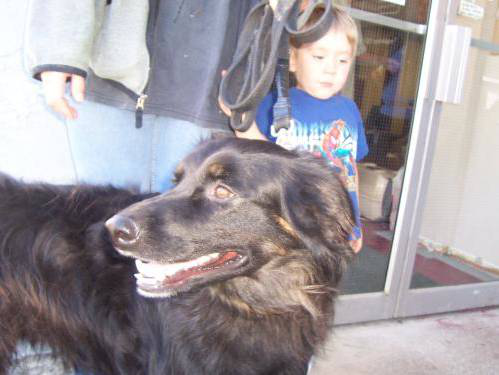

In [41]:
Image.open(path + 'test/' + filenames[0])

In [42]:
isdogs = preds[:, 1]

In [43]:
isdogs[:5]

array([  1.0000e+00,   2.8174e-15,   1.0000e+00,   1.0000e+00,   1.0000e+00], dtype=float32)

In [44]:
ids = [int(f[8:f.find('.')]) for f in filenames]

In [45]:
ids[:5]

[160, 1138, 1470, 7901, 5291]

In [46]:
subm = np.stack([ids, isdogs], axis=1)

In [47]:
subm[:5]

array([[  1.6000e+02,   1.0000e+00],
       [  1.1380e+03,   2.8174e-15],
       [  1.4700e+03,   1.0000e+00],
       [  7.9010e+03,   1.0000e+00],
       [  5.2910e+03,   1.0000e+00]])

In [48]:
np.savetxt(path + 'submit98.csv', subm, fmt='%d,%.5f', header='id,label', comments='')

In [49]:
from IPython.display import FileLink

In [50]:
FileLink(path + 'submit98.csv')

/home/hsgui/repo/nbs/data/dogs-vs-cats-redux-kernels-edition/submit98.csv